In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Noisy Linear Data

In [2]:
input_layer = [1]
hidden_layers = [3, 3]
output_layer = [1]

data = np.arange(1, 50, 0.5) * np.random.standard_normal(98)
feature_data = data[:-1]
target_data = data[1:]

n_epochs = 25
learning_rate = 0.001

In [3]:
bnn_linear = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_linear.generate_m()
bnn_linear.generate_v()
bnn_linear.train(n_epochs)

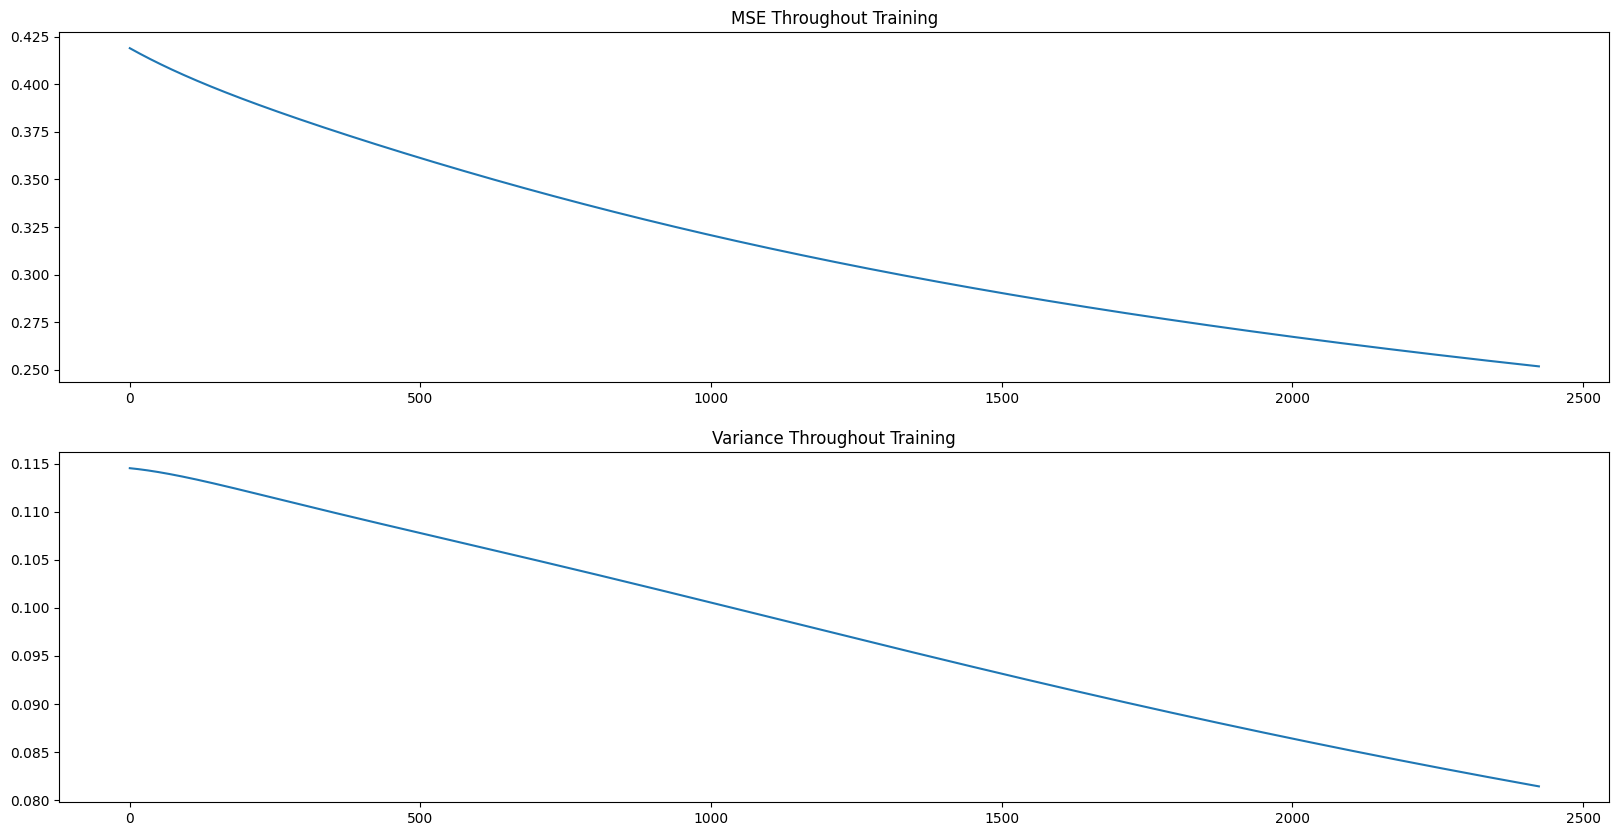

In [4]:
bnn_linear.visualize_performance()

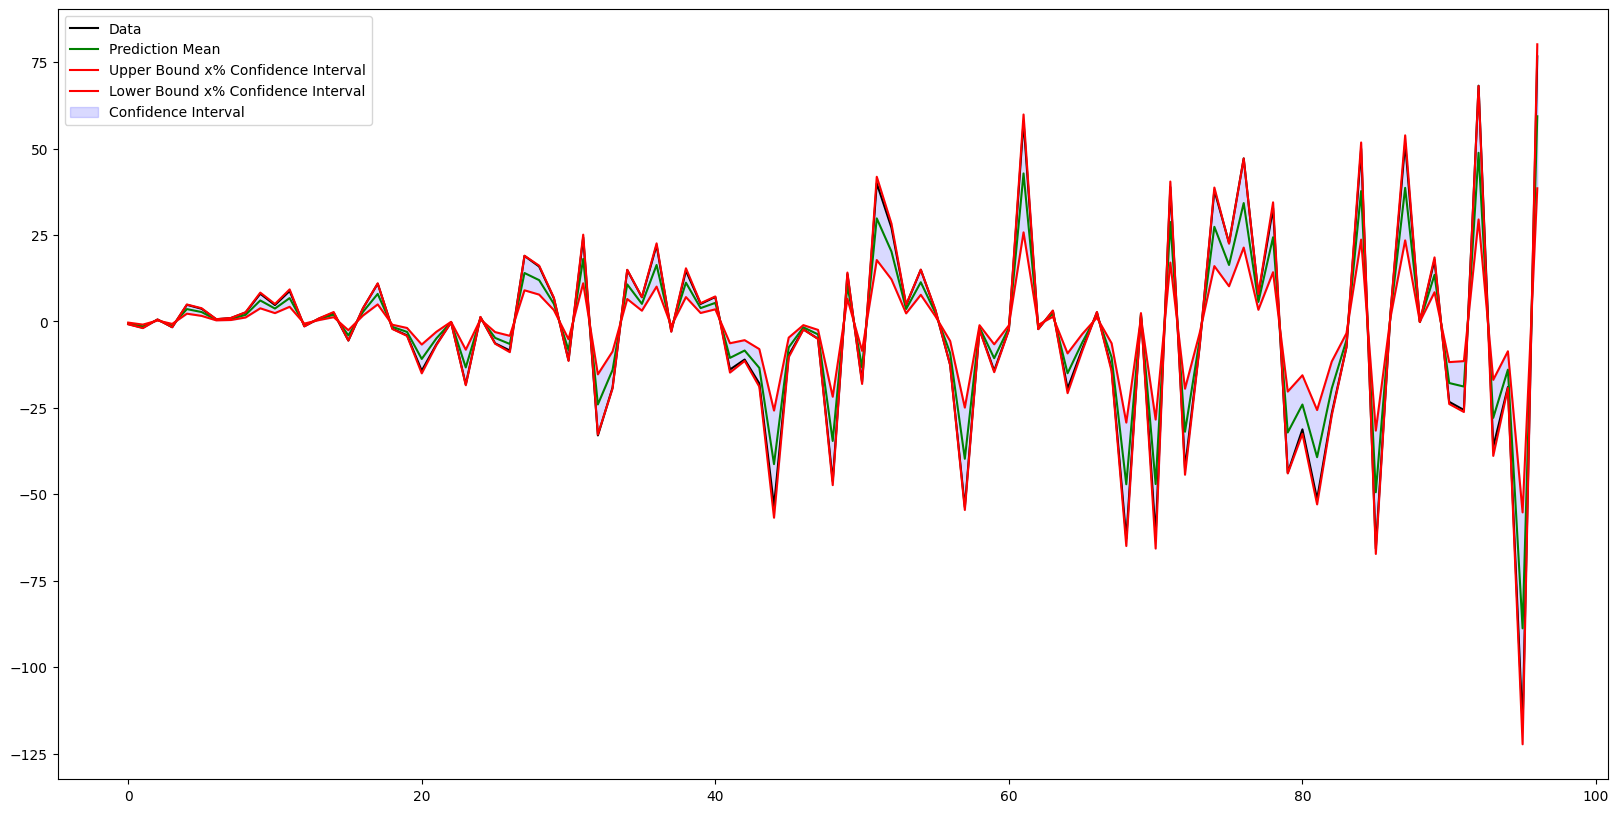

In [5]:
bnn_linear.predict()
bnn_linear.visualize_predictions()

# Model Performance On Noisy Sinusoidal Data

In [6]:
input_layer = [1]
hidden_layers = [16, 8, 4]
output_layer = [1]

data = np.sin(np.arange(1, 50, 0.5)) * np.random.standard_normal(98)
feature_data = data[:-1]
target_data = data[1:]

n_epochs = 25
learning_rate = 0.001

In [7]:
bnn_sinusoidal = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_sinusoidal.generate_m()
bnn_sinusoidal.generate_v()
bnn_sinusoidal.train(n_epochs)

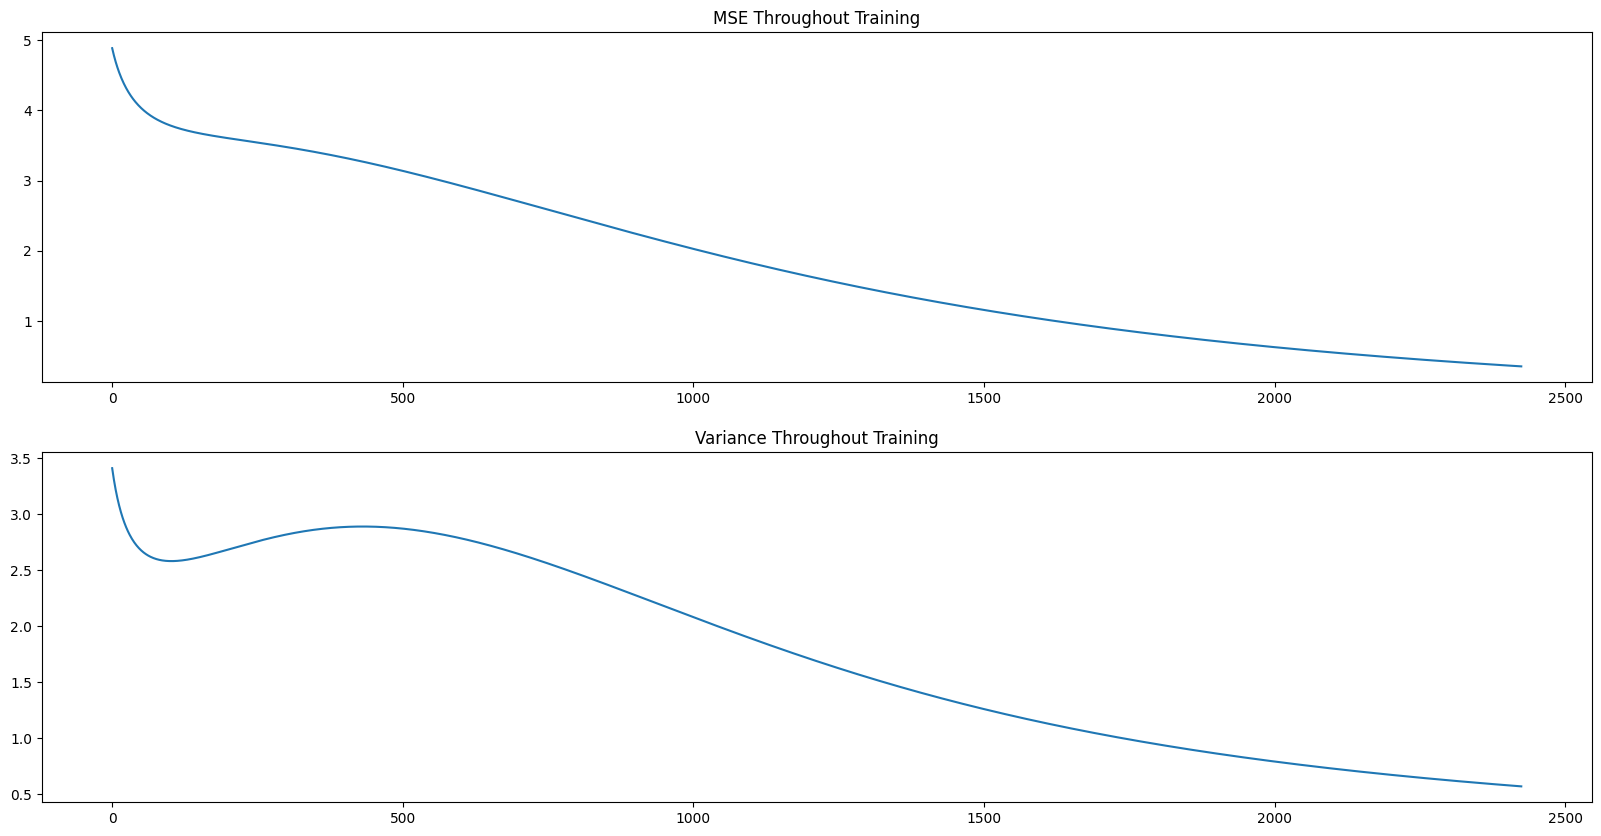

In [8]:
bnn_sinusoidal.visualize_performance()

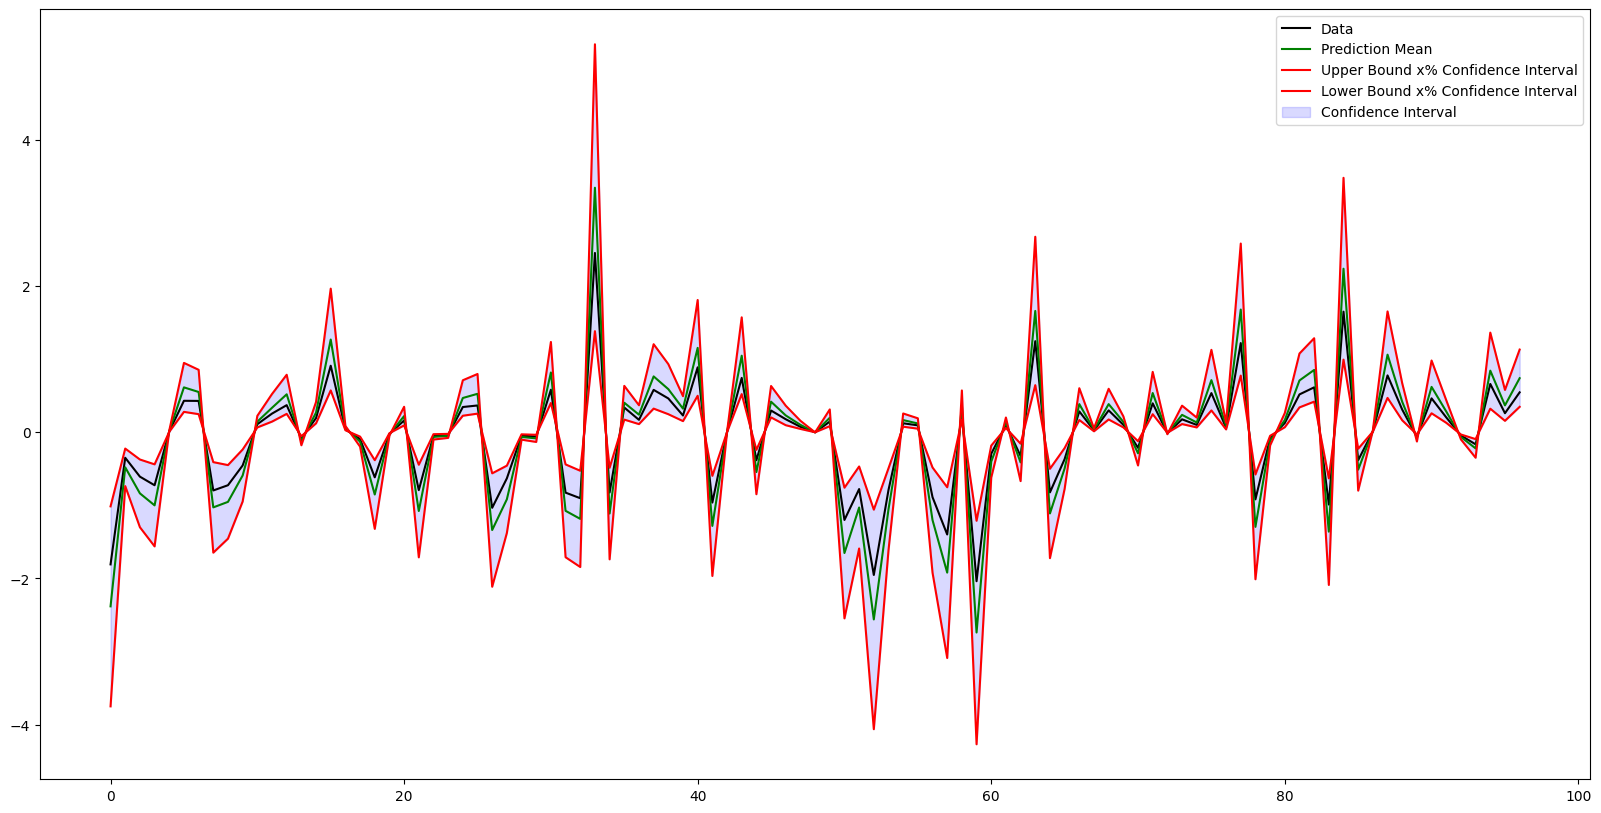

In [9]:
bnn_sinusoidal.predict()
bnn_sinusoidal.visualize_predictions()

# Model Performance on a Single Outlier Data

In [10]:
input_layer = [1]
hidden_layers = [2, 8, 4]
output_layer = [1]

data = np.sin(np.arange(1, 50, 0.5))
data[25] = data[25] * 10
feature_data = data[:-1]
target_data = data[1:]

n_epochs = 25
learning_rate = 0.001

In [11]:
bnn_outlier = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_outlier.generate_m()
bnn_outlier.generate_v()
bnn_outlier.train(n_epochs)

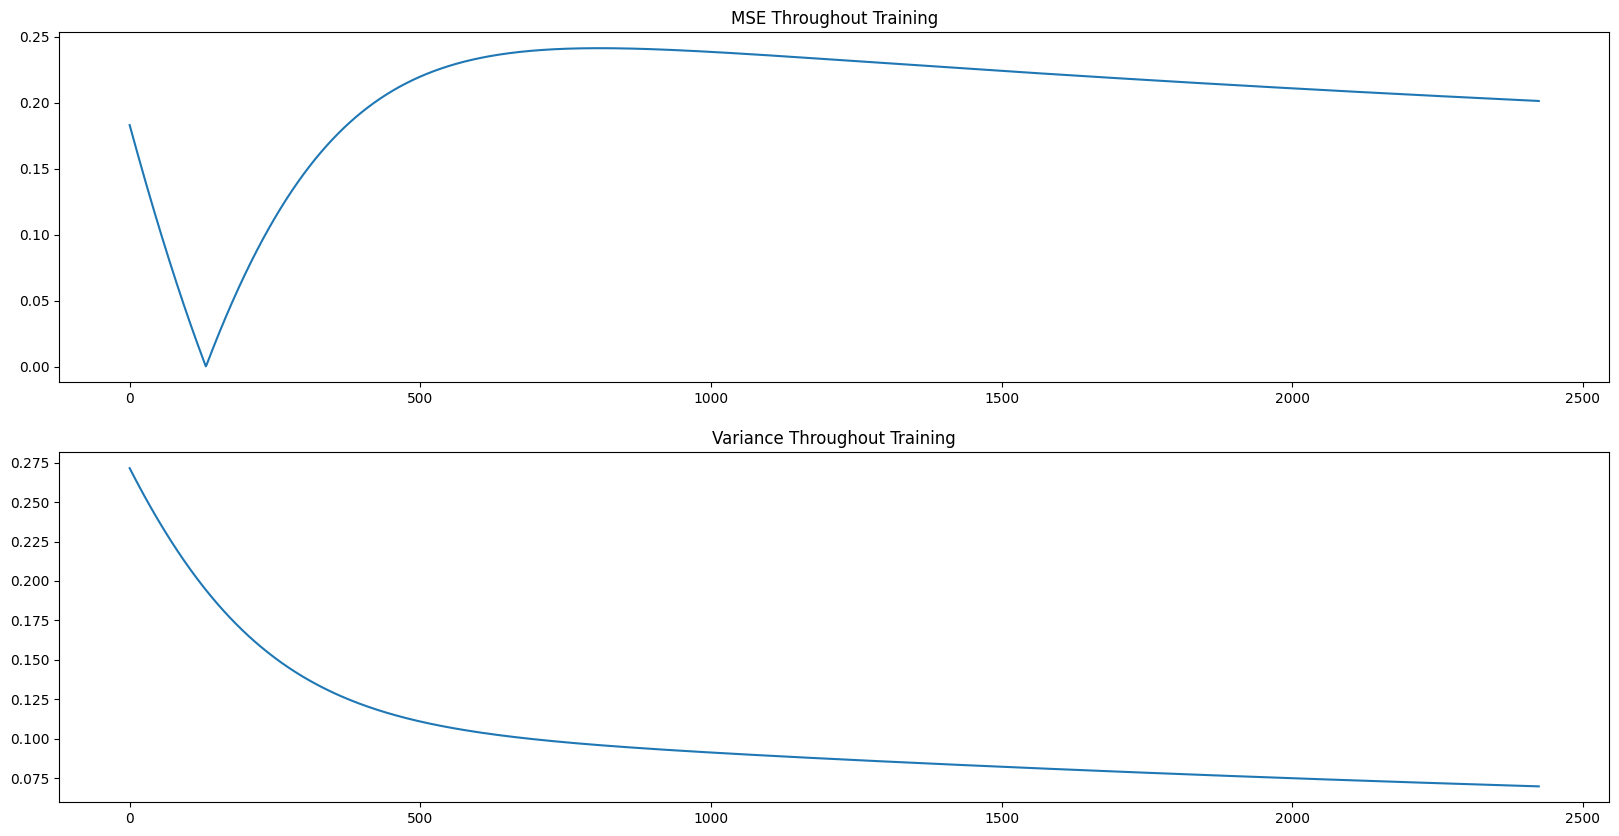

In [12]:
bnn_outlier.visualize_performance()

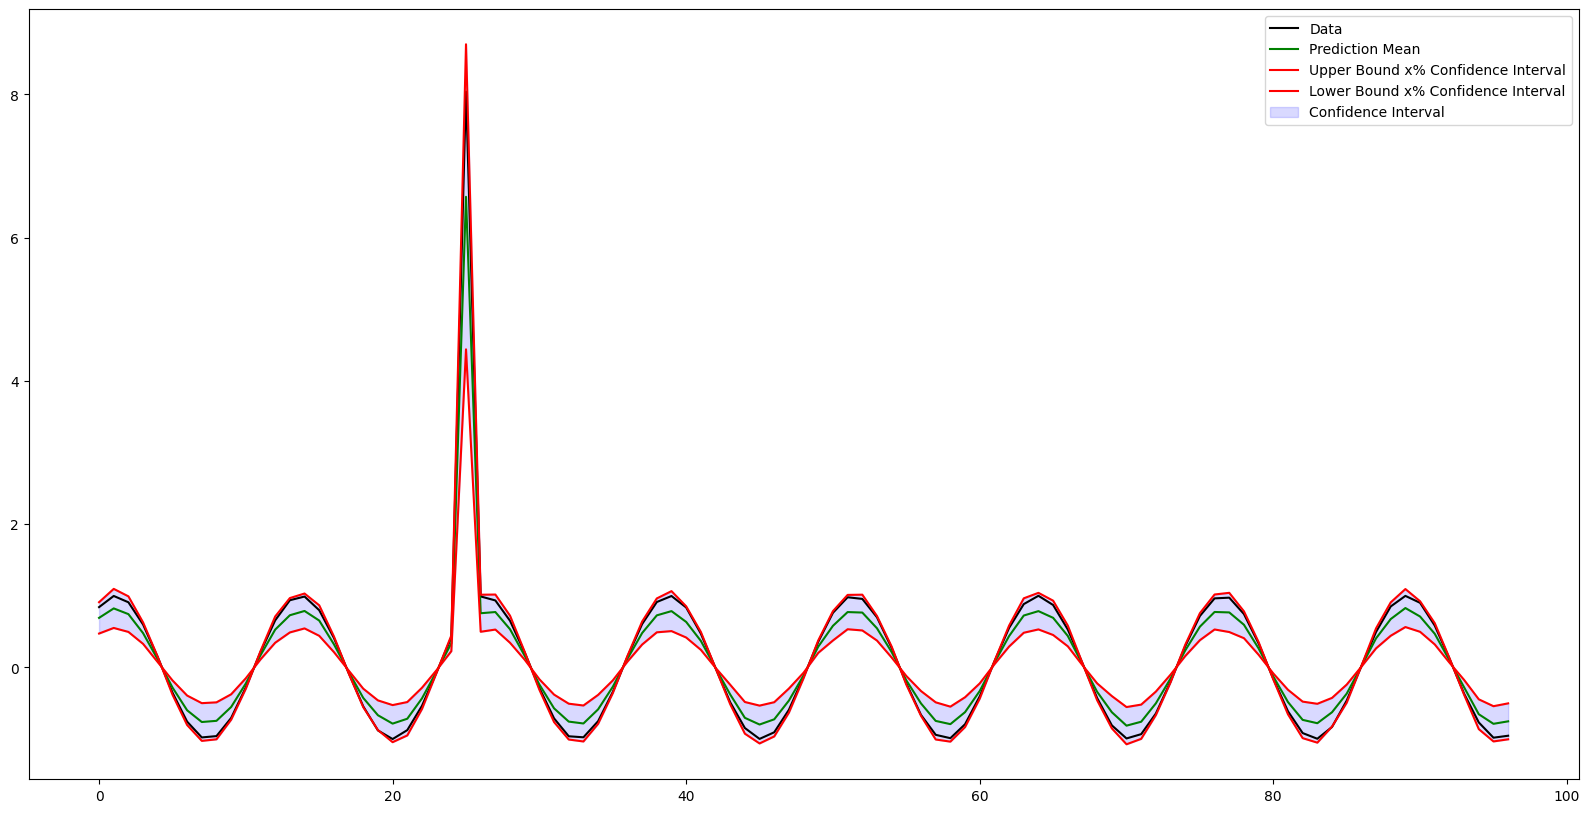

In [13]:
bnn_outlier.predict()
bnn_outlier.visualize_predictions()

In [14]:
df_pred = pd.DataFrame({'Mean':bnn_outlier.prediction_mean,
                           'Lower Bound':bnn_outlier.lower_bound,
                           'Upper Bound':bnn_outlier.upper_bound})
df_pred['Upper - Lower'] = np.abs(df_pred['Upper Bound'] - df_pred['Lower Bound'])

In [15]:
df_pred.sort_values('Upper - Lower', ascending=False)

Mean  Lower Bound  Upper Bound  Upper - Lower
25  6.569605     4.440237     8.698973       4.258735
39  0.785907     0.506867     1.064947       0.558080
77  0.767562     0.493865     1.041259       0.547394
1   0.823733     0.550970     1.096497       0.545527
83 -0.779060    -0.507790    -1.050330       0.542540
..       ...          ...          ...            ...
17 -0.060807    -0.041775    -0.079838       0.038063
23 -0.054378    -0.037187    -0.071569       0.034382
67  0.044668     0.030485     0.058851       0.028367
86  0.013911     0.009520     0.018302       0.008783
42 -0.007092    -0.004883    -0.009301       0.004418

[97 rows x 4 columns]

# Model Performance on Multiple Outlier Data

In [16]:
input_layer = [1]
hidden_layers = [8, 4, 2]
output_layer = [1]

x_data = np.arange(-25, 25, 0.5)
y_data = np.cos(x_data)
y_data[10] = y_data[10] * 10
y_data[-10] = y_data[-10] * (10)
y_data[25] = y_data[25] * (10)
feature_data = y_data[:-1]
target_data = y_data[1:]

n_epochs = 25
learning_rate = 0.001

In [17]:
bnn_multiple_outlier = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn_multiple_outlier.generate_m()
bnn_multiple_outlier.generate_v()
bnn_multiple_outlier.train(n_epochs)

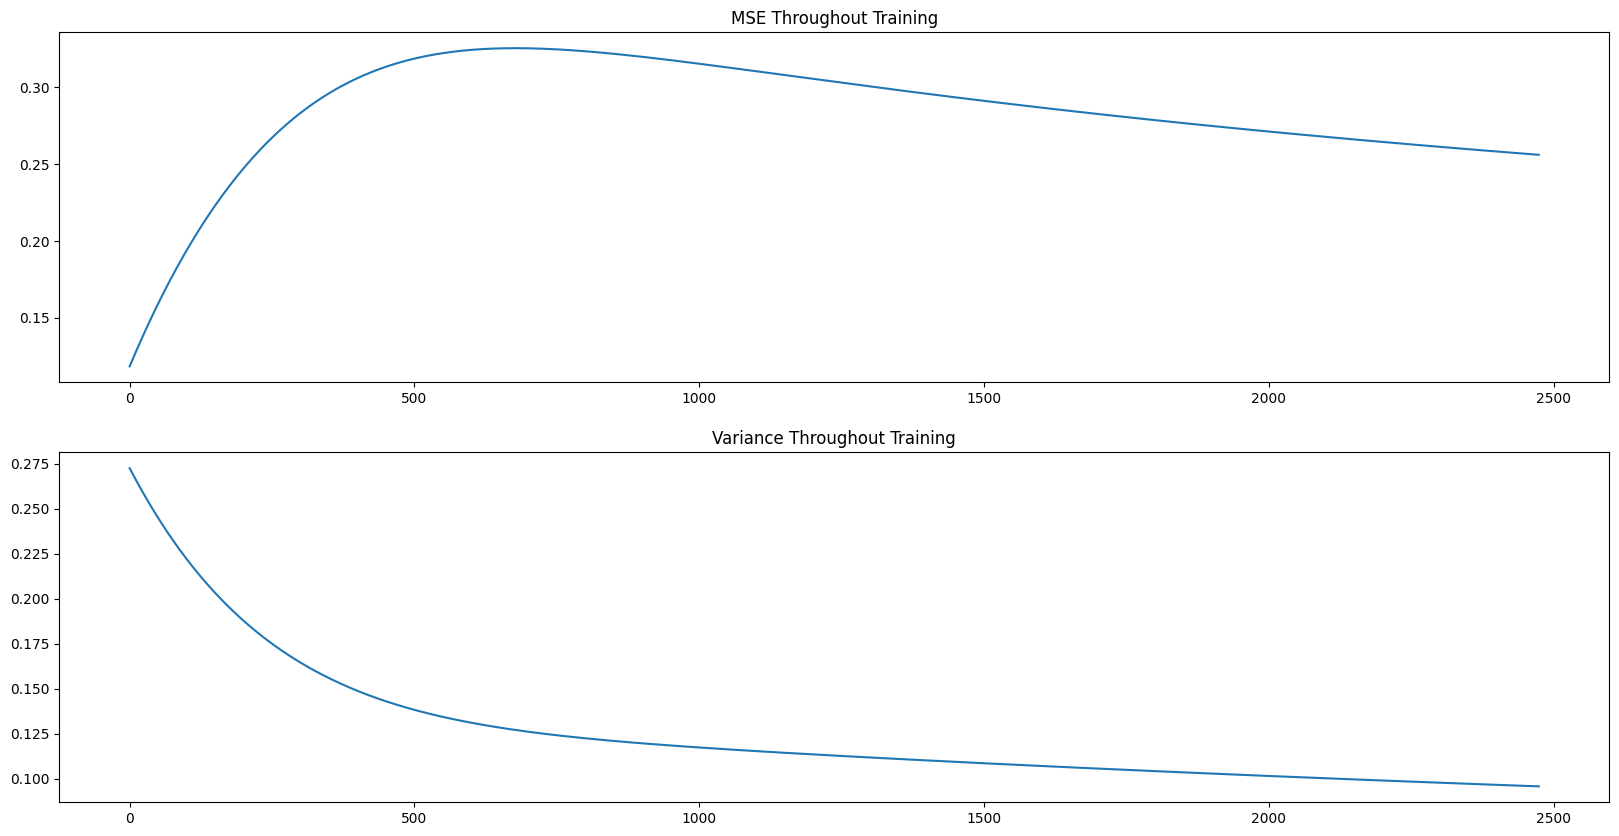

In [18]:
bnn_multiple_outlier.visualize_performance()

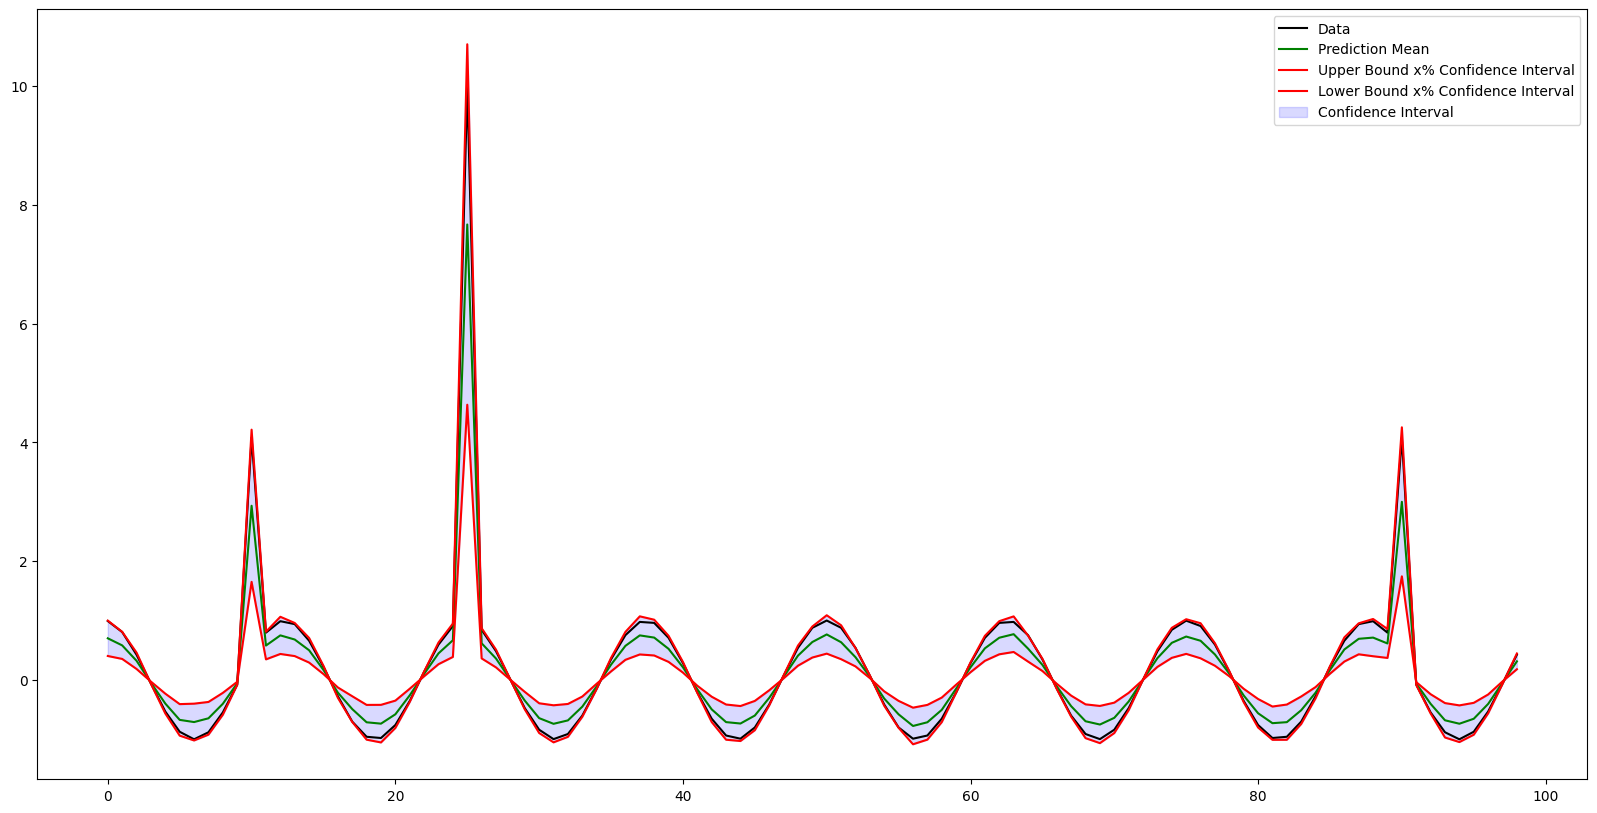

In [19]:
bnn_multiple_outlier.predict()
bnn_multiple_outlier.visualize_predictions()

In [20]:
df_pred = pd.DataFrame({'Mean':bnn_multiple_outlier.prediction_mean,
                           'Lower Bound':bnn_multiple_outlier.lower_bound,
                           'Upper Bound':bnn_multiple_outlier.upper_bound})
df_pred['Upper - Lower'] = np.abs(df_pred['Upper Bound'] - df_pred['Lower Bound'])

In [21]:
df_pred

Mean  Lower Bound  Upper Bound  Upper - Lower
0   0.700552     0.402729     0.998375       0.595646
1   0.581358     0.353401     0.809314       0.455913
2   0.321718     0.184110     0.459326       0.275216
3  -0.047167    -0.028781    -0.065552       0.036771
4  -0.398503    -0.231523    -0.565483       0.333960
..       ...          ...          ...            ...
94 -0.737857    -0.428984    -1.046730       0.617747
95 -0.654426    -0.386057    -0.922794       0.536737
96 -0.404324    -0.245492    -0.563156       0.317664
97 -0.046768    -0.025733    -0.067803       0.042070
98  0.312350     0.179665     0.445034       0.265369

[99 rows x 4 columns]